# ERDDAP BioPuff Plotter

In [1]:
from erddapy import ERDDAP
import pandas as pd

import numpy as np 
import urllib.request 
import xarray as xr 
import time 
from matplotlib import pyplot as plt 
from datetime import date,datetime

np.warnings.filterwarnings('ignore')

In [2]:
server_url = 'http://ecofoci-field.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)
dfname = pd.read_csv(e.get_search_url(response='csv', search_for=f'biopuff'))

df_all = {}
for dataset in sorted(dfname['Dataset ID'].values):
    try:
        print(dataset)

        d = ERDDAP(server=server_url,
                   protocol='tabledap',
                   response='csv',
                  )

        d.dataset_id=dataset

        pdf = d.to_pandas(
            index_col='time (UTC)',
            parse_dates=True,
            skiprows=(1,)  # units information can be dropped.
        )

        pdf.sort_index(inplace=True)
        pdf.columns = [x[1].split()[0] for x in enumerate(pdf.columns)]

        df_all.update({dataset:pdf})
    except:
        pass

2021_SpringDeployed_BS_BioPUFFS_POPS0001_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0001_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0002_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0004_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0004_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0005_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0005_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0006_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0006_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0007_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0007_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0008_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0008_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0009_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0009_surfacedata
2021_SpringDeployed_BS_BioPUFFS_POPS0010_bottomdata
2021_SpringDeployed_BS_BioPUFFS_POPS0010_surfacedata
2021_SpringDeployed_BS_BioPUFFS_bottomdata
2021_SpringDeployed_BS_BioPUFFS_surfacedata


In [3]:
#more QC for late deployment data - sfc
df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata'].loc[df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata']['Pressure_Bar'] >= 100,'Pressure_Bar'] = np.nan
df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata'].loc[df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata']['Temp_DegC_0'] >= 25,'Temp_DegC_0'] = np.nan
df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata'].loc[df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata']['Temp_DegC_1'] >= 25,'Temp_DegC_1'] = np.nan

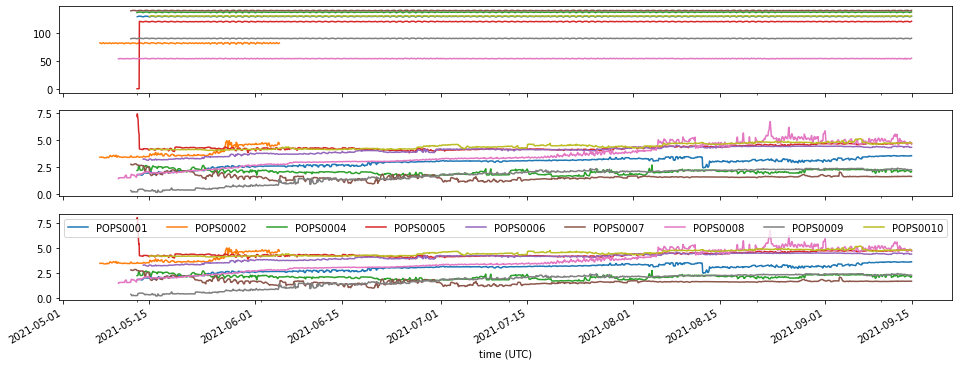

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(16,6), sharex=True)


for i,puff in df_all['2021_SpringDeployed_BS_BioPUFFS_bottomdata'].groupby('timeseries_id'):
    puff['Pressure_Bar'].plot(ax=axes[0],label=i,)
    puff['Temp_DegC_0'].plot(ax=axes[1])
    puff['Temp_DegC_1'].plot(ax=axes[2],label=i)

plt.legend(ncol=len(df_all['2021_SpringDeployed_BS_BioPUFFS_bottomdata'].groupby('timeseries_id').count()))

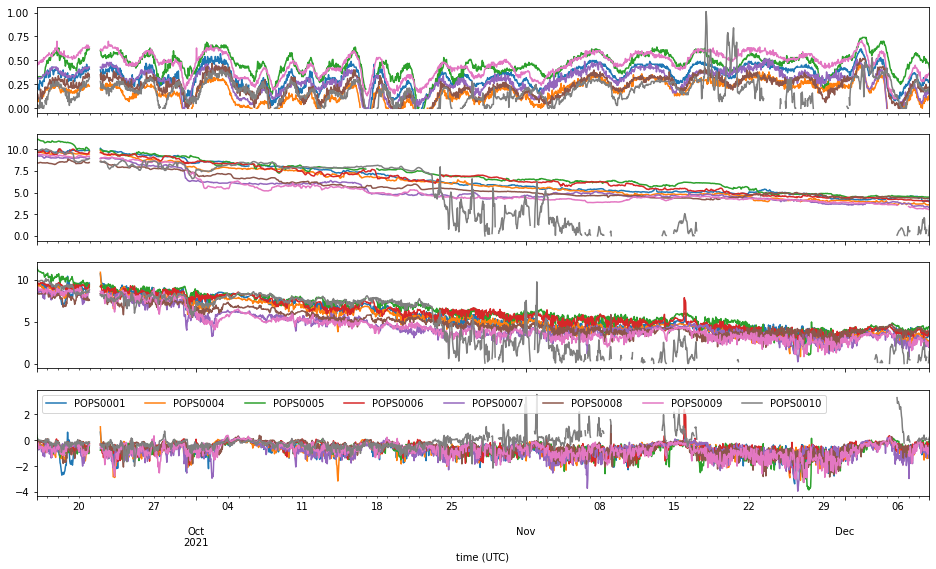

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(16,9), sharex=True)


for i,puff in df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata'].groupby('trajectory_id'):
    puff['Pressure_Bar'].plot(ax=axes[0],label=i,)
    puff['Temp_DegC_0'].plot(ax=axes[1])
    puff['Temp_DegC_1'].plot(ax=axes[2])
    (puff['Temp_DegC_1']-puff['Temp_DegC_0']).plot(ax=axes[3],label=i)

plt.legend(ncol=len(df_all['2021_SpringDeployed_BS_BioPUFFS_surfacedata'].groupby('trajectory_id').count()))

***Notes for more QC***
- POPS002 only completed a portion of its data transmission
- POPS010 looks odd after Oct23rd... both temp sensors noisier than others... and larger values are being reported.  Position also appears stationary?